# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)
# **Good Luck**

# 1. Loading Data

In [1]:
import sys
sys.path.insert(0, 'F:\GIT\AI-Course-Python\AI-Python\PythonEnv1\packages')
from MLPckg import MLClass as ml

In [8]:
pathOfData = 'F:\GIT\AI-Course-Python\AI-Python\PythonEnv1\ML\data'
fileDataName = 'Concrete_Data.xls'

df= ml.readDataPandas(pathOfData,fileDataName)
df.columns = ['Cement','Blast','FlyAsh','Water','Superplasticizer','Coarse','FineAgg','Age','ConcreteStength']
df.head()

,Cement,Blast,FlyAsh,Water,Superplasticizer,Coarse,FineAgg,Age,ConcreteStength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# 2. Data Pre-processing

## 2.1 Outliers Handling


In [3]:
# df_clean = ml.ol_uniIQR(df)
# df_clean = ml.ol_zScore(df)
# df_clean = ml.ol_meanStd(df)
df_clean = ml.ol_multiIQR(df)
df_clean.describe()

,Cement,Blast,FlyAsh,Water,Superplasticizer,Coarse,FineAgg,Age,ConcreteStength
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,275.778883,73.832074,57.996915,180.596064,6.243090,974.925266,776.566064,32.380851,34.890179
std,101.941679,86.399221,64.394052,18.748390,5.342797,77.604239,75.112813,28.573535,16.601128
min,102.000000,0.000000,0.000000,127.000000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,164.900000,0.000000,932.000000,740.575000,7.000000,22.605505
50%,255.500000,20.000000,0.000000,183.800000,6.930000,968.000000,780.000000,28.000000,33.398907
75%,349.000000,145.000000,118.382500,192.000000,10.300000,1031.500000,822.200000,28.000000,44.693558
max,540.000000,342.100000,200.100000,228.000000,22.100000,1145.000000,945.000000,120.000000,79.400056


## 2.2 Features Selection

In [21]:
X=df_clean.iloc[:,:-1]
y=df_clean.iloc[:,-1]

In [5]:
# ml.fl_lassoCV(X,y)
# ml.fl_corl(df_clean)
# ml.fl_bckElim(X,y)
# ml.fl_rfe(X,y)

In [18]:
# drop columns
# 'Cement','Blast','FlyAsh','Water','Superplasticizer','Coarse','FineAgg','Age'
# df_selected = df_clean.drop(columns=['Coarse','FineAgg'], axis=1)

In [19]:
# X =df_selected.iloc[:,:-1]
# y=df_selected.iloc[:,-1]

# 3. Building the Model

Decision Tree regression: 
 R-Squared:  0.8946444139587338 
 MAE:  4.112055820879739 
 MSE:  32.16420898033112 



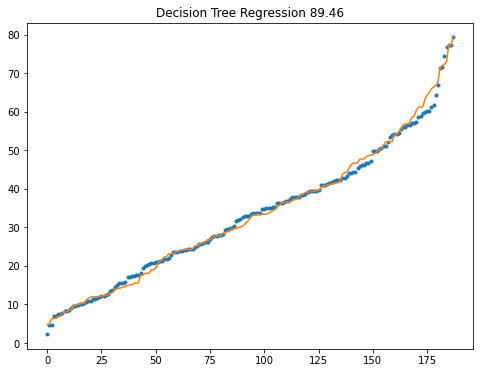

In [22]:
# 0- Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 30, shuffle = True )

# 0.1- Scale features
# X_train,X_test = ml.dp_scaleFeatures(X_train,X_test)

# 1- Linear Regression
DTree_pred  = ml.mod_DTreeReg( X_train, X_test, y_train, y_test, 22)

# 2- Calculate Scores
DTree_error_r2, DTree_error_mae, DTree_error_mse = ml.mod_scores(y_test,DTree_pred)

# 3- Print all scores
print('Decision Tree regression: \n', 
'R-Squared: ',DTree_error_r2,'\n', 
'MAE: ', DTree_error_mae,'\n', 
'MSE: ', DTree_error_mse,'\n=================\n')

# 4- Draw Graph
ml.mod_drawPred(y_test, DTree_pred, 'Decision Tree Regression %s' % ( round(DTree_error_r2 *100,2) ))